In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import numpy as np
import scipy
from lungmask import mask


In [3]:
os.sys.path.append('../')
import config

In [4]:
img_sitk = sitk.ReadImage(os.path.join(config.data_paths["CT0"], "study_0001.nii.gz"))
img_nib = nib.load(os.path.join(config.data_paths["CT0"], "study_0001.nii.gz"))

In [5]:
segmentation = mask.apply(img_sitk, batch_size=1, noHU=False)

100%|██████████| 3/3 [00:00<00:00, 227.22it/s]


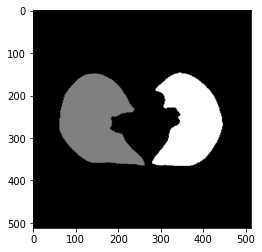

In [7]:
plt.imshow(segmentation.transpose(1,2,0)[:,:,25], cmap=plt.cm.gray)

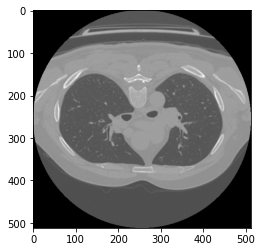

In [6]:
plt.imshow(img_nib.get_fdata().transpose(1,0,2)[:,:,25], cmap=plt.cm.gray)

In [7]:
img_nib.header['pixdim']

array([-1.  ,  0.68,  0.68,  8.  ,  0.  ,  0.  ,  0.  ,  0.  ],
      dtype=float32)

In [8]:
def resample(image, slice_thickness, pixel_spacing, new_spacing=[1, 1, 1]):
    spacing = np.array([slice_thickness] + [pixel_spacing, pixel_spacing], dtype=np.float32)
    resize_factor = np.flip(spacing / new_spacing)
    new_shape = np.round(image.shape * resize_factor)
    real_resize_factor = new_shape / image.shape
    resampled_image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    return resampled_image, real_resize_factor

In [9]:
img_nib.header['pixdim'][1:4]

array([0.68, 0.68, 8.  ], dtype=float32)

In [10]:
def resample(image, pix_dims, new_spacing=[1, 1, 8]):
    resize_factor = pix_dims / new_spacing
    new_shape = np.round(image.shape * resize_factor)
    real_resize_factor = new_shape / image.shape
    resampled_image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    return resampled_image

In [21]:
resampled_img = resample(img_nib.get_fdata().transpose(1,0,2), img_nib.header['pixdim'][1:4])

In [22]:
img_nib.get_fdata().shape

(512, 512, 43)

In [23]:
resampled_img.shape

(348, 348, 43)

In [24]:
resampled_seg = resample(segmentation.transpose(1,2,0), img_nib.header['pixdim'][1:4])

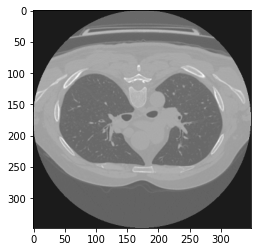

In [25]:
plt.imshow(resampled_img[:,:,25], cmap=plt.cm.gray)

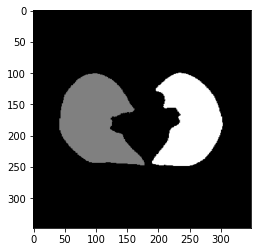

In [26]:
plt.imshow(resampled_seg[:,:,25], cmap=plt.cm.gray)

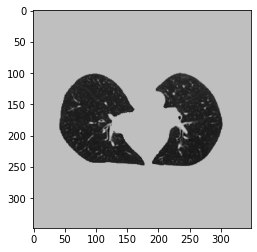

In [29]:
plt.imshow(np.where(resampled_seg == 0, resampled_seg, resampled_img)[:,:,25], cmap=plt.cm.gray)